# 实验七 问卷调查报告
实验目的：回收问卷调查表，整理数据并进行统计

## 调查主题：乡村医疗卫生调查研究

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import jieba
from wordcloud import WordCloud


plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

### 1. 你有过在农村生活的经历吗？

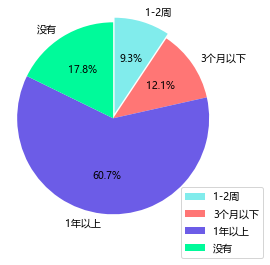

In [2]:
label = ['1-2周','3个月以下','1年以上','没有']
df1 = pd.Series([10,13,65,19])
colors = ['#81ecec','#ff7675','#6c5ce7','#00FA9A']
plt.pie(df1, labels = label, explode = (0.05, 0, 0,0), autopct = '%.1f%%', colors = colors, startangle = 90, counterclock = False)
plt.axis('square')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.2))
plt.show()

### 2. 你之前生活过的地方离能够买到正规药品的小诊所有多远？

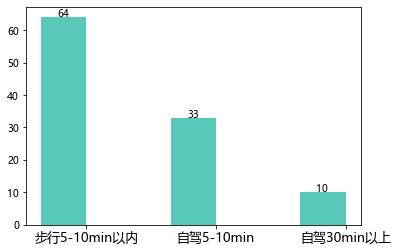

In [3]:
df2 = pd.Series([64,33,10])
label = ['步行5-10min以内','自驾5-10min','自驾30min以上']
bar_width = 0.35

plt.bar(np.arange(3)-0.5*bar_width, df2,
        width=bar_width, color='#58C9B9')
plt.xticks(np.arange(3), label, fontsize=13)
for i, j in enumerate(df2):
    plt.text(i-0.5*bar_width-0.05, j+0.1, str(j))

### 3.离家最近的小诊所医生的性别是？

Text(0, -3, '男：84.11%')

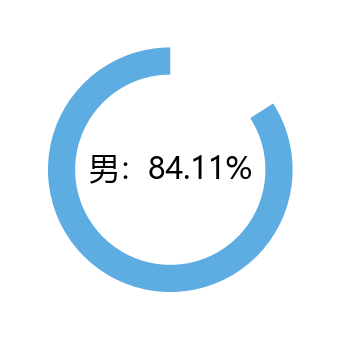

In [4]:
df3 = pd.Series([90,17])
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection':'polar'})
data = round(90 / 107 * 100,2)
startangle = 90
x = (data * math.pi *2)/ 100
left = (startangle * math.pi *2)/ 360 #控制起始位置
plt.xticks([])
plt.yticks([])
ax.spines.clear()
ax.barh(1, x, left=left, height=1, color='#5DADE2')
plt.ylim(-3, 3)
plt.text(0, -3, "男：84.11%", ha='center', va='center', fontsize=30)

### 4.该医生的年龄大致在？

<BarContainer object of 3 artists>

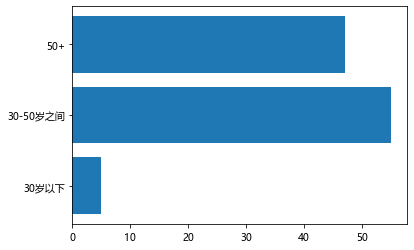

In [5]:
label = ['30岁以下','30-50岁之间','50+']
df4 = pd.Series([5,55,47])
plt.barh(label,df4)

### 5.生活所在地(乡村)有无卫生所？

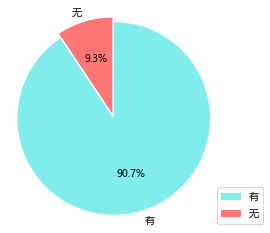

In [6]:
label = ['有','无']
df5 = pd.Series([97,10])
colors = ['#81ecec','#ff7675']
plt.pie(df5, labels = label, explode = (0.05, 0), autopct = '%.1f%%', colors = colors, startangle = 90, counterclock = False)
plt.axis('square')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.2))
plt.show()

### 6.卫生所的设施怎样？能否解决村民的日常感冒问题?

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\新橙\AppData\Local\Temp\jieba.cache
Loading model cost 0.912 seconds.
Prefix dict has been built successfully.


(-0.5, 399.5, 199.5, -0.5)

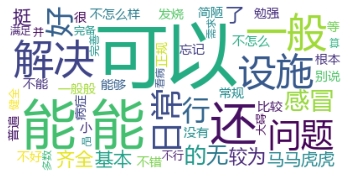

In [7]:
df6 = pd.read_excel('乡村.xlsx')
word1 = df6['卫生所设施情况'].values
word1.sort()
num_ =  len(np.where(word1 == '(空)')[0])
word1 = word1[num_:]

word_list = [" ".join(jieba.cut(row)) for row in word1]
new_text = ' '.join(word_list)
wordcloud = WordCloud(font_path="msyh.ttc",
                      background_color="white",
                      max_words=2000,).generate(new_text)
plt.imshow(wordcloud)
plt.axis('off')

从词云图中可以看出，大部分被调查者的回答均是中性词，比如："能","可以","一般"等，说明现设有卫生所的地区能能够解决居民日常 感冒问题。
但是小部分较为偏僻的地区甚至没有设立卫生所，或者卫生所的设施情况比较马虎。

### 7. 给乡村医疗提一些建议

(-0.5, 399.5, 199.5, -0.5)

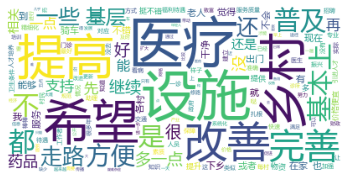

In [8]:
word2 = df6['乡村医疗建设建议'].values
word2.sort()
num_ =  len(np.where(word2 == '无')[0])
word2 = word2[num_:]
excludes = {'',".","。","无","了","更","的"}
word_list = [" ".join(jieba.cut(row)) for row in word2]
new_text = ' '.join(word_list)
wordcloud = WordCloud(font_path="msyh.ttc",
                      background_color="white",
                      max_words=2000,stopwords=excludes).generate(new_text)
plt.imshow(wordcloud)
plt.axis('off')

![图](https://i.bmp.ovh/imgs/2022/06/15/85d4a7ce410bd007.png)
<br>
总结得到的建议如下： <br>
1.希望医疗能够普及到每个地方，不遗忘每一个贫困地区；增加诊所的数量，由于诊所数量的问题，经常会出现医务人员忙不过来的现象。<br>
2.医务人员少，有空村的现象，年轻人少，大部分是小时候就认识的医生，鲜少有新鲜的血液流入。<br>
3.医德建设、医生的专业能力方面需要提升。<br>
4.医疗设备方面需要改善和升级，一些常见药物急需完善。<br>
5.改善乡村的交通建设，让人们出行更便捷。<br>
6.大部分诊所存在药物价格不一的现象，需要市场来规范药物价格，而不是坐地起价。<br>
7.乡村医疗建设细化，分门诊而不是大杂烩，便于村民们看病。<br>
8.提高乡村医护人员的待遇，加大乡村医疗建设的资金投入。<br>
9.向村民们普及基本的卫生医疗方面的知识，帮助他们解决日常的小感冒问题。<br>
10.可以尝试借助互联网的力量，采取线上问诊的方式。<br>